# Arquitetura da AlexNet

A AlexNet é uma arquitetura de rede neural convolucional (CNN) desenvolvida por Alex Krizhevsky, Ilya Sutskever e Geoffrey Hinton. Ela obteve grande destaque ao vencer o desafio ImageNet em 2012, demonstrando a eficácia das CNNs em tarefas de visão computacional.

A arquitetura da AlexNet consiste em cinco camadas convolucionais seguidas por três camadas totalmente conectadas. Vamos detalhar cada uma dessas camadas:

    Camadas convolucionais:
        A primeira camada convolucional da AlexNet recebe uma entrada de tamanho 227x227x3 (largura, altura, canais de cores). Ela utiliza 96 filtros de tamanho 11x11 com um stride (passo) de 4 pixels.
        Após a convolução, é aplicada uma função de ativação ReLU (Rectified Linear Unit) para introduzir não-linearidade.
        Em seguida, é utilizada uma camada de max pooling com tamanho de filtro 3x3 e um stride de 2 pixels para reduzir a dimensionalidade.
        Essas etapas são repetidas com variações na quantidade de filtros: a segunda camada convolucional utiliza 256 filtros de tamanho 5x5, a terceira, quarta e quinta camadas convolucionais utilizam 384, 384 e 256 filtros de tamanho 3x3, respectivamente.
        A ativação ReLU é aplicada após cada camada convolucional.

    Camadas totalmente conectadas:
        Após as camadas convolucionais, os recursos extraídos são passados para camadas totalmente conectadas.
        A sexta e sétima camadas são densas, cada uma com 4096 neurônios. Essas camadas possuem uma função de ativação ReLU e também aplicam dropout com uma taxa de 0.5 para evitar overfitting.
        A oitava camada e última camada totalmente conectada consiste em um número de neurônios igual ao número de classes do conjunto de dados (1000 no caso do ImageNet). A função de ativação usada é a softmax, que gera probabilidades de pertencimento a cada classe.

    Outras características:
        A AlexNet utiliza regularização L2 para combater o overfitting, aplicando uma penalidade ao termo de perda.
        O otimizador SGD (Stochastic Gradient Descent) é usado para ajustar os pesos da rede durante o treinamento.
        A taxa de aprendizado inicial é definida como 0.01 e é reduzida durante o treinamento para ajudar na convergência.
        Os dados de treinamento são alimentados em mini-batches, onde cada mini-batch contém 128 exemplos.


![alexnet](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*3B8iO-se13vA2QfZ4OBRSw.png)

A arquitetura da AlexNet é conhecida por sua capacidade de extrair recursos discriminativos complexos de imagens e seu desempenho impressionante em tarefas de classificação de imagens. Desde então, várias arquiteturas mais profundas e complexas foram desenvolvidas, mas a AlexNet foi um marco importante na evolução das redes neurais convolucionais.

# Dataset Apple Leaf Disease - Shylesh

https://www.kaggle.com/datasets/shylesh101/apple-leaf-disease-shylesh


Identificação de doenças prevalentes em folhas de macieira.


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!chmod 600 r"C:\Users\Eliezer Junior\Git\MBA\3DTS-DeepLearning\Aula2\kaggle.json"


!kaggle datasets download -d shylesh101/apple-leaf-disease-shylesh
!unzip /content/apple-leaf-disease-shylesh.zip -d /content/kaggle/

'chmod' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


'kaggle' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'unzip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


# Biblioteca

In [7]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam


In [8]:
train_path =  os.path.join("kaggle", "apple_dataset", "train")
valid_path = os.path.join("kaggle", "apple_dataset", "valid")
test_path = os.path.join("kaggle", "apple_dataset", "test")

## ImageDataGenerator

O método ImageDataGenerator é uma função fornecida pela biblioteca Keras, que é uma biblioteca de alto nível para construção e treinamento de redes neurais. O ImageDataGenerator é usado para gerar lotes de dados de imagem de forma eficiente durante o treinamento de redes neurais convolucionais (CNNs).

O ImageDataGenerator oferece uma maneira conveniente de pré-processar imagens em tempo real enquanto o modelo está sendo treinado. Ele aplica várias transformações às imagens de entrada, como redimensionamento, rotação, ampliação e corte, para aumentar a quantidade de dados disponíveis para treinamento e melhorar a capacidade do modelo de generalização.

Essas transformações de dados são aplicadas em tempo real durante o treinamento, o que significa que o conjunto de dados de treinamento não precisa ser pré-processado e armazenado separadamente. Em vez disso, o ImageDataGenerator aplica as transformações conforme necessário e gera os lotes de imagens diretamente da pasta ou diretório fornecido.

O ImageDataGenerator também possui recursos de aumento de dados, o que significa que ele pode gerar várias versões de cada imagem de treinamento, aplicando transformações aleatórias. Isso ajuda a evitar o superajuste (overfitting) e melhora a capacidade do modelo de generalizar para novas imagens.

Em resumo, o ImageDataGenerator do Keras é uma ferramenta útil para pré-processar imagens em tempo real durante o treinamento de redes neurais convolucionais. Ele aplica transformações às imagens de entrada para aumentar a quantidade de dados disponíveis e melhorar a capacidade de generalização do modelo.

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

## flow_from_directory

O método flow_from_directory é uma função específica da biblioteca Keras, que é uma biblioteca de aprendizado profundo em Python. Esse método é usado para carregar e pré-processar automaticamente um grande conjunto de imagens armazenadas em um diretório específico.

O objetivo principal do flow_from_directory é facilitar o processo de alimentação de dados em um modelo de aprendizado profundo, particularmente para tarefas de classificação de imagens. Ele assume que você tem um diretório com subdiretórios que representam as diferentes classes de imagens que você deseja classificar.

O método começa especificando o diretório raiz, que contém os subdiretórios de classes. Em seguida, ele lê as imagens de cada subdiretório, atribuindo automaticamente as classes corretas com base na estrutura do diretório. Ele também pode aplicar várias transformações, como redimensionamento, normalização, rotação e espelhamento, para preparar as imagens para o treinamento do modelo.

Uma vez que as imagens são carregadas e pré-processadas, o flow_from_directory gera lotes (batches) de dados de treinamento, que podem ser alimentados diretamente ao modelo de aprendizado profundo para o treinamento. Esses lotes incluem as imagens e suas respectivas classes, permitindo que o modelo aprenda a relação entre as características das imagens e suas classes correspondentes.

Em resumo, o flow_from_directory é uma função conveniente do Keras que simplifica o processo de carregar e pré-processar grandes conjuntos de imagens para treinar modelos de aprendizado profundo, especialmente para tarefas de classificação de imagens.

In [10]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS   = 3

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                              batch_size = BATCH_SIZE,
                                              class_mode = 'categorical',
                                              shuffle=True)

valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical',
                                             shuffle=True)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical',
                                           shuffle=True)

Found 7771 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.
Found 48 images belonging to 4 classes.


In [11]:


alexnet_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

In [12]:
alexnet_model.compile(optimizer = "Adam",
              loss='categorical_crossentropy',
              metrics=["accuracy"]
)

In [13]:
epochs = 10

alexnet_history = alexnet_model.fit(train_set,
                                    batch_size = 16,
                                    steps_per_epoch=len(train_set),
                                    validation_data=valid_set,
                                    epochs=epochs,
                                    validation_steps=len(valid_set),
                                    verbose=1,
                                  )

Epoch 1/10
243/243 [==============================] - 38s 96ms/step - loss: 4.8222 - accuracy: 0.6513 - val_loss: 8.7793 - val_accuracy: 0.4735
Epoch 2/10
243/243 [==============================] - 22s 92ms/step - loss: 0.7681 - accuracy: 0.7845 - val_loss: 11.4532 - val_accuracy: 0.2743
Epoch 3/10
243/243 [==============================] - 22s 91ms/step - loss: 0.5683 - accuracy: 0.8429 - val_loss: 6.9498 - val_accuracy: 0.3294
Epoch 4/10
243/243 [==============================] - 20s 84ms/step - loss: 0.4558 - accuracy: 0.8745 - val_loss: 4.0614 - val_accuracy: 0.5069
Epoch 5/10
243/243 [==============================] - 21s 87ms/step - loss: 0.3626 - accuracy: 0.9032 - val_loss: 3.6469 - val_accuracy: 0.4900
Epoch 6/10
243/243 [==============================] - 21s 85ms/step - loss: 0.3761 - accuracy: 0.9130 - val_loss: 1.0889 - val_accuracy: 0.7447
Epoch 7/10
243/243 [==============================] - 21s 86ms/step - loss: 0.3694 - accuracy: 0.9198 - val_loss: 0.5296 - val_accuracy

In [14]:
scores1 = alexnet_model.evaluate(valid_set)
scores1

61/61 [==============================] - 4s 69ms/step - loss: 0.3375 - accuracy: 0.9182


[0.3374766707420349, 0.918167769908905]

In [15]:
scores2 = alexnet_model.evaluate(test_set)
scores2

2/2 [==============================] - 1s 492ms/step - loss: 0.1794 - accuracy: 0.9167


[0.17936725914478302, 0.9166666865348816]

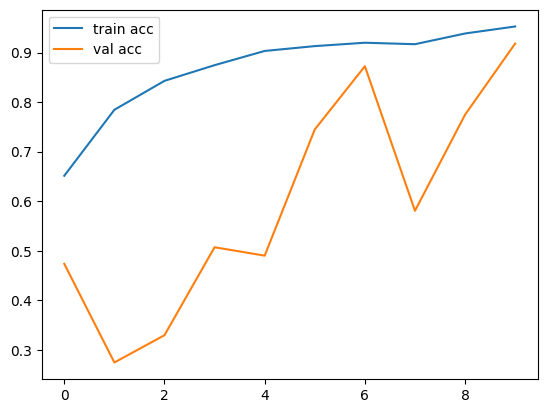

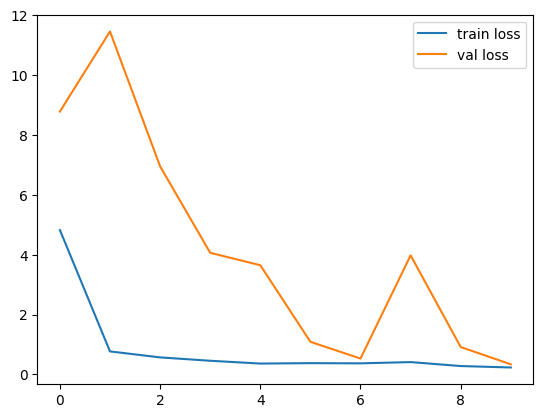

In [16]:
plt.plot(alexnet_history.history['accuracy'], label='train acc')
plt.plot(alexnet_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

plt.plot(alexnet_history.history['loss'], label='train loss')
plt.plot(alexnet_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [17]:
class_names = list(train_set.class_indices.keys())

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence



In [18]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(alexnet_model, images[i])
        index = labels[i].argmax(axis=0)
        actual_class = class_names[index]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

Output hidden; open in https://colab.research.google.com to view.

In [19]:
valid_set1 = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical',
                                             shuffle=False)



Found 1943 images belonging to 4 classes.


In [20]:
Y_pred = alexnet_model.predict(valid_set1, len(valid_set1))
y_pred = np.argmax(Y_pred, axis=1)
y_true = valid_set1.classes
class_names = list(valid_set1.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

61/61 [==============================] - 4s 61ms/step
                          precision    recall  f1-score   support

      Apple___Apple_scab       0.96      0.86      0.90       504
       Apple___Black_rot       0.91      0.99      0.95       497
Apple___Cedar_apple_rust       1.00      0.85      0.92       440
         Apple___healthy       0.84      0.97      0.90       502

                accuracy                           0.92      1943
               macro avg       0.93      0.92      0.92      1943
            weighted avg       0.93      0.92      0.92      1943



# Para casa:

Retreine o nooso modelo alterando o método ImageDataGenerator. Para isso acesse a documentação do método:

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator